<a href="https://colab.research.google.com/github/amansandhu408/deep-learning/blob/main/Xavier_Glorat_and_He_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ushape.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "saifullah57/ushape-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

100%|██████████| 7.41k/7.41k [00:00<00:00, 7.36MB/s]

First 5 records:           X         Y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0


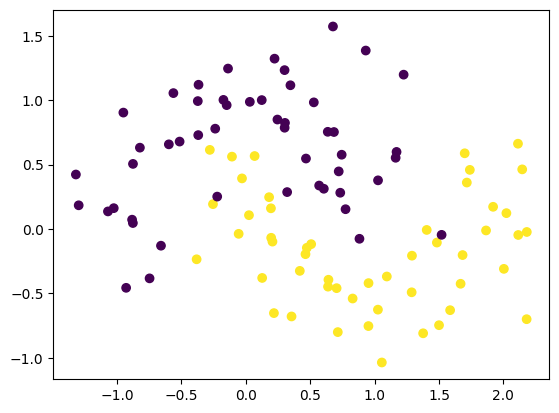

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X= df.iloc[:,0:2].values
y= df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#Xavier / Glorat


you can use formula and multiply yourself, or either can use kernel_initializer parameter


note : Xavier / Glorat is used only for tanh ,sigmoid

In [8]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
#model.add(Dense(10,activation='tanh',kernel_initializer='glorat_uniform))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[-0.35273185, -0.10747093, -0.2797765 ,  0.08651179, -0.11634517,
          0.03625929, -0.08117533, -0.41631594, -0.6759171 ,  0.61779016],
        [-0.13135624, -0.48779616,  0.6922681 , -0.19335037,  0.32453185,
         -0.62645084,  0.02755713,  0.03800738, -0.26610896, -0.39203227]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.43267092,  0.20196152, -0.2379562 ,  0.51336837, -0.2667047 ,
         -0.20796174, -0.30712056,  0.12953824,  0.32993323, -0.47373968],
        [-0.3468575 , -0.03315181,  0.5042994 ,  0.14374846, -0.05450842,
          0.41398597, -0.34111595,  0.11197764,  0.3280986 ,  0.3142795 ],
        [-0.42250782, -0.1677768 , -0.24468601, -0.3466416 , -0.1815049 ,
          0.18482536, -0.34033698,  0.24598014,  0.417221  ,  0.42741662],
        [-0.5066539 ,  0.2799546 , -0.19902188,  0.14478546,  0.42483175,
         -0.05547556, -0.4709967 ,  0.04892033, -0.14778295, -0.3721611 ],
        [-0.18066

In [10]:
initial_weights = model.get_weights()

In [14]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [15]:
model.set_weights(initial_weights)

In [16]:
model.get_weights()

[array([[ 0.04159033, -0.7119755 ,  0.08262749,  0.4642852 ,  0.85233676,
          0.02272929, -0.741354  , -0.6431242 ,  0.8248995 , -0.6290882 ],
        [-0.49803513,  0.00985456, -0.7954671 ,  0.35090113,  0.6217427 ,
         -0.02074696, -0.2891842 ,  0.00381257,  0.42617163, -0.7259584 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-5.90444840e-02, -1.12053588e-01, -1.51386395e-01,
         -9.35353711e-02, -5.78219891e-02,  4.28245105e-02,
         -3.23887587e-01,  8.57690871e-02, -4.63569164e-02,
         -9.90276858e-02],
        [-2.92152584e-01, -8.60846639e-01, -2.60668010e-01,
          2.27600932e-01,  3.04639876e-01,  2.46515293e-02,
         -4.49631028e-02,  6.81986749e-01,  1.32475570e-02,
          8.32841396e-02],
        [-8.34673762e-01,  8.00113892e-04, -2.34271362e-01,
         -2.04018548e-01,  2.88350452e-02, -1.63909495e-01,
          7.58386850e-02,  1.07511483e-01, -1.30595982e-01,
          6.9369420

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)
history = model.fit(X,y , epochs =100, validation_split= 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.7203 - loss: 0.6513 - val_accuracy: 0.8500 - val_loss: 0.6365
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8539 - loss: 0.6337 - val_accuracy: 0.9000 - val_loss: 0.6237
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8445 - loss: 0.6308 - val_accuracy: 0.8000 - val_loss: 0.6109
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8383 - loss: 0.6238 - val_accuracy: 0.8000 - val_loss: 0.5982
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7852 - loss: 0.6165 - val_accuracy: 0.8500 - val_loss: 0.5864
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7969 - loss: 0.6089 - val_accuracy: 0.8000 - val_loss: 0.5749
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7969 - loss: 0.6016 - val_accuracy: 0.8500 - val_loss: 0.5628
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7883 - loss: 0.5895 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

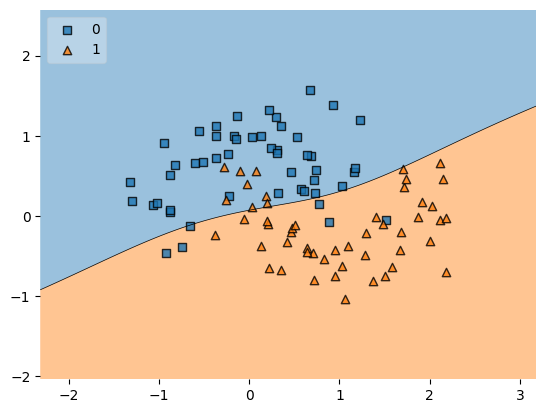

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend= 2)

#He
similarly for He too.

note : He is used only for relu.

In [21]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.get_weights()

[array([[ 0.10241301, -1.7882941 ,  1.1301463 ,  1.9201219 ,  0.9174272 ,
         -0.79096967, -0.39026788, -1.1890795 , -0.18489203, -1.4579699 ],
        [-0.18017589,  0.15114787, -0.74088985, -0.89730173, -0.85505426,
          0.34220147, -0.08594725, -0.16481952, -0.42102578,  0.4322268 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.29242817,  0.5516249 , -0.70521444, -0.1464084 , -0.23035029,
         -0.13029137, -0.7004734 , -0.61544067, -0.7577463 ,  0.6918422 ],
        [ 0.969311  , -0.34578857,  0.51256216,  0.04115214,  0.26994845,
         -0.7377752 , -0.17782436, -0.3024017 ,  0.36054248, -0.5560004 ],
        [-0.8153166 ,  0.8013697 , -0.10786707, -0.22469799,  0.3857664 ,
         -0.24370101,  0.16544506, -0.38649285, -0.19378844, -0.41715083],
        [-0.3359997 , -0.5983362 , -0.13089243, -0.01495679, -0.46351513,
         -0.4283137 , -0.06593844,  0.31980455,  0.9304599 , -0.59021735],
        [ 0.11854

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)
history = model.fit(X,y , epochs =100, validation_split= 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.4922 - loss: 0.7595 - val_accuracy: 0.5000 - val_loss: 0.6046
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5039 - loss: 0.7557 - val_accuracy: 0.5000 - val_loss: 0.5904
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5234 - loss: 0.6969 - val_accuracy: 0.5000 - val_loss: 0.5774
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.5652
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4609 - loss: 0.7079 - val_accuracy: 0.5000 - val_loss: 0.5542
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4922 - loss: 0.6806 - val_accuracy: 0.5000 - val_loss: 0.5443
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5312 - loss: 0.6479 - val_accuracy: 0.5500 - val_loss: 0.5357
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4672 - loss: 0.6995 - val_accuracy: 0.5500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

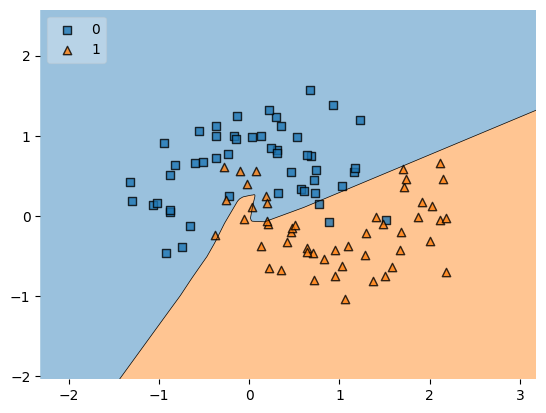

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)